In [14]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/sales_items.csv', encoding ="latin1")
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933.00,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480.00,9/15/2012,2804,205.70,117.11,576782.80,328376.44
2,Europe,Russia,Office Supplies,Offline,L,05/02/2014,341417157.00,05/08/2014,1779,651.21,524.96,1158502.59,933903.84
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792.00,07/05/2014,8102,9.33,6.92,75591.66,56065.84
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02/01/2013,115456712.00,02/06/2013,5062,651.21,524.96,3296425.02,2657347.52


In [15]:
df.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID          float64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
dtype: object

In [16]:
#columns that have null values
df.isnull().sum()

Region            0
Country           0
Item Type         1
Sales Channel     0
Order Priority    1
Order Date        1
Order ID          7
Ship Date         1
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
dtype: int64

In [17]:
#Use fillna to fill in missing data with '' - blank otherwise the string values (Object) will change to INT & cant perform groupby.
df1 = df.fillna("")
df1.head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933.00,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480.00,9/15/2012,2804,205.70,117.11,576782.80,328376.44
2,Europe,Russia,Office Supplies,Offline,L,05/02/2014,341417157.00,05/08/2014,1779,651.21,524.96,1158502.59,933903.84


In [18]:
# to change ALL Floating point numbers to 2 decimal places.
pd.options.display.float_format = '{:.2f}'.format
df1

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933.00,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480.00,9/15/2012,2804,205.70,117.11,576782.80,328376.44
2,Europe,Russia,Office Supplies,Offline,L,05/02/2014,341417157.00,05/08/2014,1779,651.21,524.96,1158502.59,933903.84
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792.00,07/05/2014,8102,9.33,6.92,75591.66,56065.84
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02/01/2013,115456712.00,02/06/2013,5062,651.21,524.96,3296425.02,2657347.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,,Online,,7/26/2011,512878119.00,09/03/2011,888,109.28,35.84,97040.64,31825.92
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038.00,12/28/2011,6267,9.33,6.92,58471.11,43367.64
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,06/01/2016,728815257.00,6/29/2016,1485,154.06,90.93,228779.10,135031.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106.00,08/08/2015,5767,81.73,56.67,471336.91,326815.89


In [19]:
#to change the type of number to Integer (so no decimal places)
df1[['Units Sold']] = df1[['Units Sold']].astype(int)
df1

#to change the the type of ship date to Ireland format (dd/mm/yyyy).
df["Ship Date"] = pd.to_datetime(df['Ship Date']).dt.strftime('%d/%m/%Y')
df[['Ship Date','Units Sold']].head()

,Ship Date,Units Sold
0,27/06/2010,9925
1,15/09/2012,2804
2,08/05/2014,1779
3,05/07/2014,8102
4,06/02/2013,5062


In [20]:
#to rename a column.
df1.rename(columns={'Item Type': 'Item Category'}, inplace=True)
df1['Item Category'].head()

0          Baby Food
1             Cereal
2    Office Supplies
3             Fruits
4    Office Supplies
Name: Item Category, dtype: object

In [21]:
#create a column.  Display only Country, Item Type & Total Profit.
df1['Total Profit']= df['Units Sold'] * df['Unit Price']

#Display only Country, Item Type & Total Profit.
df1[['Country','Item Category','Total Profit']].head()

,Country,Item Category,Total Profit
0,Tuvalu,Baby Food,2533654.00
1,Grenada,Cereal,576782.80
2,Russia,Office Supplies,1158502.59
3,Sao Tome and Principe,Fruits,75591.66
4,Rwanda,Office Supplies,3296425.02


In [22]:
total_profit = df1['Total Profit'].sum()
print('Total Profit =', total_profit)

Total Profit = 137348768.31


In [23]:
profits = df1['Total Profit'].sort_values(ascending=False)
print ('Total profits =', 
       profits)

Total profits = 13   5997054.98
33   5513227.50
68   5396577.27
75   4647149.58
38   4368316.68
        ...    
47     22312.29
23     20404.71
10     19103.44
71      6279.09
88      4870.26
Name: Total Profit, Length: 100, dtype: float64


In [24]:
#To use groupby (by lowest Total Revenue first)
#df1.groupby(['Region'])
#print (df1.groupby('Region').groups)

In [35]:
#To use groupby (by lowest Total Revenue first)
df_revenue = df1[['Region','Sales Channel','Total Profit','Total Revenue']]

#To groupby using 2 categories (Region & Sales Channel) by lowest Total Revenue first.
df_revenue.groupby(['Region','Sales Channel']).sum().sort_values('Total Revenue', ascending=True)

,,Total Profit,Total Revenue
Region,Sales Channel,,
Central America and the Caribbean,Online,916273.30,916273.30
Australia and Oceania,Offline,4201867.85,4201867.85
Middle East and North Africa,Offline,4993138.88,4993138.88
North America,Offline,5643356.55,5643356.55
Central America and the Caribbean,Offline,8254112.19,8254112.19
Middle East and North Africa,Online,9059567.70,9059567.70
Asia,Online,9200993.26,9200993.26
Australia and Oceania,Online,9892397.28,9892397.28
Asia,Offline,12146097.76,12146097.76


In [26]:
#Using groupby at with 2 categories to levels 
largest_revenue = df_revenue.groupby(['Region', 'Sales Channel']).sum().sort_values('Total Revenue', ascending=True)
largest_revenue.nlargest(5,'Total Revenue')

Total Profit  Total Revenue
Region             Sales Channel                             
Sub-Saharan Africa Offline         25733749.52    25733749.52
Europe             Offline         18122486.45    18122486.45
                   Online          15246445.66    15246445.66
Sub-Saharan Africa Online          13938281.91    13938281.91
Asia               Offline         12146097.76    12146097.76

In [29]:
#To create a Pivot Table
region_profits = pd.pivot_table(df1, index=['Region','Sales Channel'], values=['Total Profit'],aggfunc={'Total Profit':sum}, margins = True).round(2)
table

C:\Users\liamr\AppData\Local\Temp\ipykernel_16096\916277569.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  region_profits = pd.pivot_table(df1, index=['Region','Sales Channel'], values=['Total Profit'],aggfunc={'Total Profit':sum}, margins = True).round(2)


<Axes: ylabel='Region,Sales Channel'>

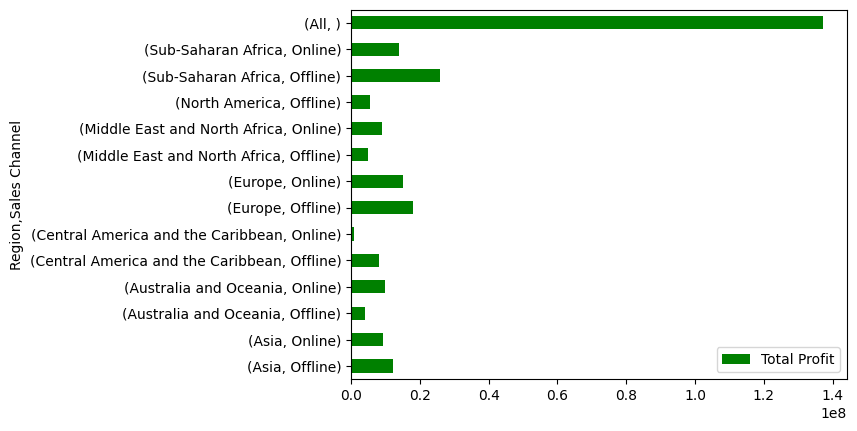

In [31]:
region_profits.plot(kind= "barh",color= "green")

In [288]:
#To create a Pivot Table. 'Index' has to be 'String'. 'Values' need to be 'int' or 'floating'.
#profit_table = pd.pivot_table(df_revenue, index=['Country'], values=['Total Profit','Units Sold'], aggfunc{'Total Profit':sum}, margins = True).round(2)
#profit_table

In [32]:
#use query method
df1.query('Country==["Australia"]')

,Region,Country,Item Category,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
32,Australia and Oceania,Australia,Office Supplies,Online,C,10/27/2015,158535134.00,11/25/2015,2924,651.21,524.96,1904138.04,1534983.04,1904138.04
60,Australia and Oceania,Australia,Cereal,Offline,H,06/09/2013,450563752.00,07/02/2013,682,205.70,117.11,140287.40,79869.02,140287.40
91,Australia and Oceania,Australia,Beverages,Offline,H,07/07/2014,240470397.00,07/11/2014,9389,47.45,31.79,445508.05,298476.31,445508.05


In [33]:
#use query method
df1.query('Country ==["Australia"]').groupby(["Units Sold"]).sum().sort_values('Total Profit', ascending= False)

,Region,Country,Item Category,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Units Sold,,,,,,,,,,,,,
2924,Australia and Oceania,Australia,Office Supplies,Online,C,10/27/2015,158535134.00,11/25/2015,651.21,524.96,1904138.04,1534983.04,1904138.04
9389,Australia and Oceania,Australia,Beverages,Offline,H,07/07/2014,240470397.00,07/11/2014,47.45,31.79,445508.05,298476.31,445508.05
682,Australia and Oceania,Australia,Cereal,Offline,H,06/09/2013,450563752.00,07/02/2013,205.70,117.11,140287.40,79869.02,140287.40


In [34]:
#Select data using .loc method. Use .loc when querying column names (alternative to .query method). 
df1.loc[(df1['Country'] == 'Australia')]

,Region,Country,Item Category,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
32,Australia and Oceania,Australia,Office Supplies,Online,C,10/27/2015,158535134.00,11/25/2015,2924,651.21,524.96,1904138.04,1534983.04,1904138.04
60,Australia and Oceania,Australia,Cereal,Offline,H,06/09/2013,450563752.00,07/02/2013,682,205.70,117.11,140287.40,79869.02,140287.40
91,Australia and Oceania,Australia,Beverages,Offline,H,07/07/2014,240470397.00,07/11/2014,9389,47.45,31.79,445508.05,298476.31,445508.05


In [292]:
#The .loc method allows for sorting of values.
df1.loc[(df1['Country'] == 'Australia'),['Country','Item Category','Total Profit','Units Sold']].sort_values("Total Profit", ascending=True).head(1)

,Country,Item Category,Total Profit,Units Sold
60,Australia,Cereal,140287.40,682


In [293]:
#Q6. Use .loc to find 'Australian' sales that is 'Offline' & Units sold > 5000. Then display only Country, Sales Channel & Units Sold
df1.loc[(df1['Country'] == 'Australia') & (df1['Sales Channel'] =='Offline') & (df1['Units Sold'] > 5000),['Country','Sales Channel','Units Sold']]  

,Country,Sales Channel,Units Sold
91,Australia,Offline,9389
